# Laboratorio 7

### Predicción de datos con AutoGluon
----

Nancy Mazariegos 22513

Santiago Pereira 22318

----

### Descripción:
El objetivo de este ejercicio es construir, entrenar y evaluar un modelo clasificador
para predecir diabetes en pacientes usando AutoGluon. Además de la práctica
técnica, se busca reflexionar sobre las ventajas, limitaciones y aplicaciones del
AutoML en problemas del mundo real, especialmente en contextos de salud donde
la interpretación y confiabilidad de los resultados son fundamentales.

----


### 1. Carga del Conjunto de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import warnings
from autogluon.tabular import TabularDataset, TabularPredictor
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv('diabetes.csv')

print("Información del dataset:")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

print("\nDescripción de las variables:")
variables_descripcion = {
    'Pregnancies': 'Número de embarazos',
    'Glucose': 'Concentración de glucosa en plasma (mg/dL)',
    'BloodPressure': 'Presión arterial diastólica (mm Hg)',
    'SkinThickness': 'Grosor del pliegue cutáneo del tríceps (mm)',
    'Insulin': 'Insulina sérica de 2 horas (mu U/ml)',
    'BMI': 'Índice de masa corporal (peso en kg/(altura en m)^2)',
    'DiabetesPedigreeFunction': 'Función de pedigrí de diabetes (factor genético)',
    'Age': 'Edad (años)',
    'Outcome': 'Variable objetivo: 0 = No diabetes, 1 = Diabetes'
}

for variable, descripcion in variables_descripcion.items():
    print(f"• {variable}: {descripcion}")


/opt/miniconda3/envs/diabetes_lab/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Información del dataset:
Dimensiones del dataset: (768, 9)
Número de filas: 768
Número de columnas: 9

Descripción de las variables:
• Pregnancies: Número de embarazos
• Glucose: Concentración de glucosa en plasma (mg/dL)
• BloodPressure: Presión arterial diastólica (mm Hg)
• SkinThickness: Grosor del pliegue cutáneo del tríceps (mm)
• Insulin: Insulina sérica de 2 horas (mu U/ml)
• BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
• DiabetesPedigreeFunction: Función de pedigrí de diabetes (factor genético)
• Age: Edad (años)
• Outcome: Variable objetivo: 0 = No diabetes, 1 = Diabetes


----

### 2. Análisis Exploratorio de Datos (EDA)

ANÁLISIS EXPLORATORIO DE DATOS

STADÍSTICAS DESCRIPTIVAS
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11

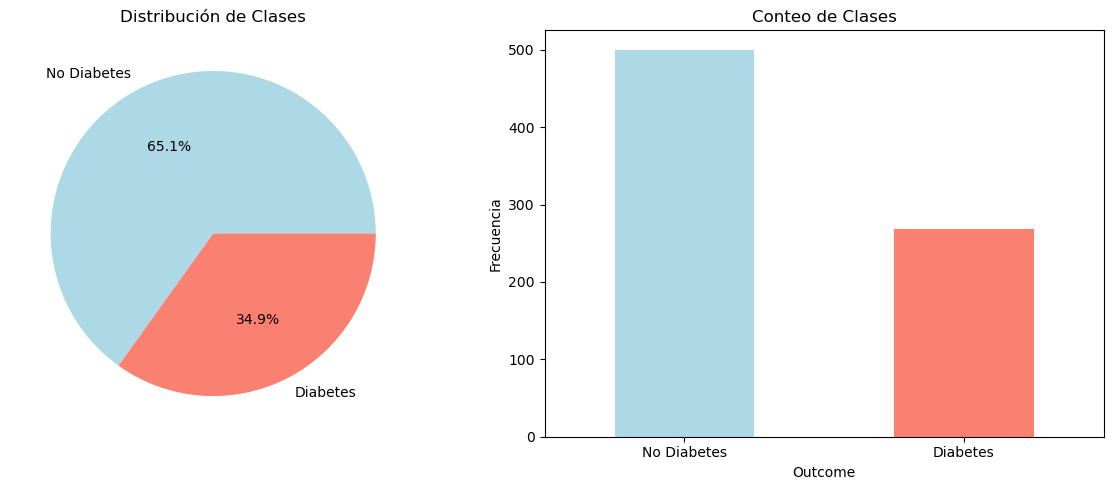


VISUALIZACIÓN DE DISTRIBUCIONES


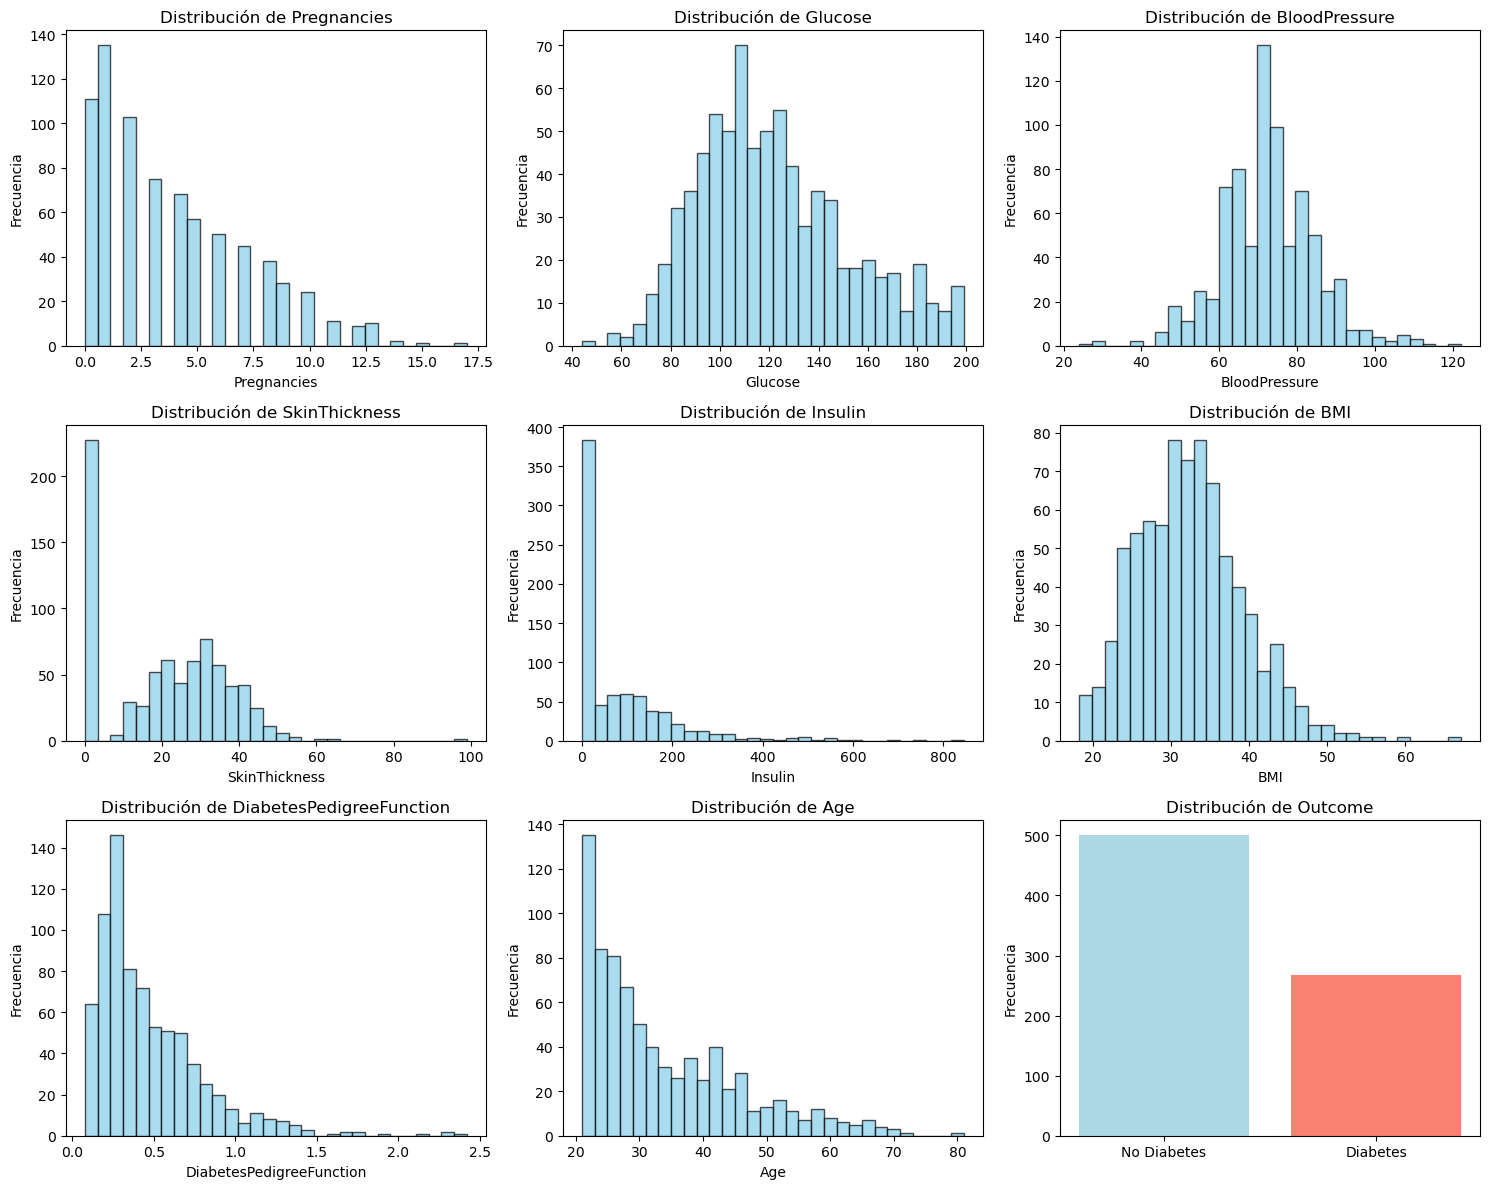

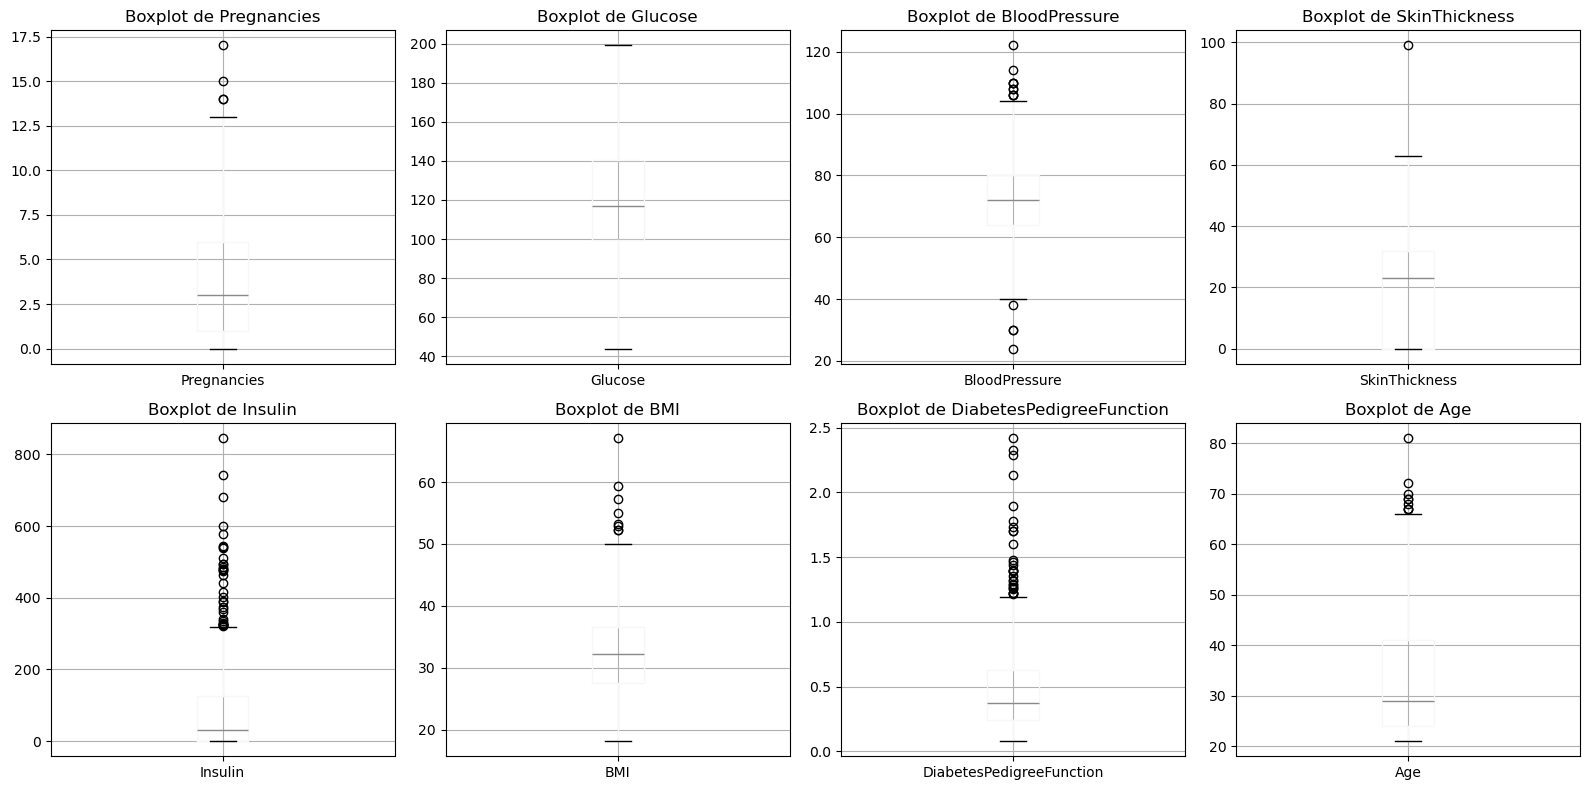


MATRIZ DE CORRELACIÓN


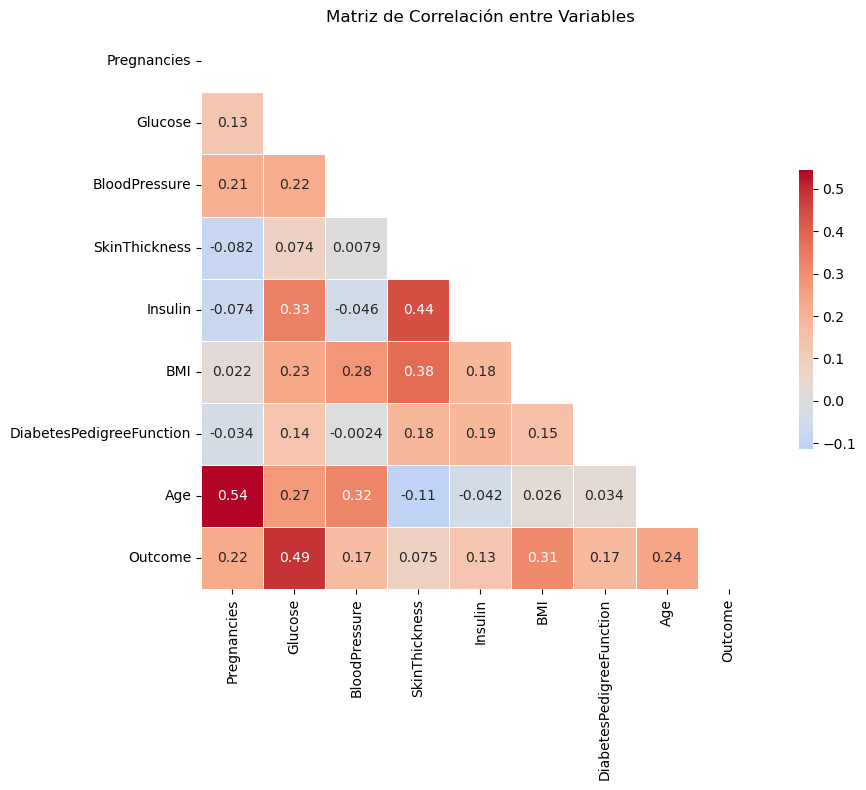

Correlaciones con la variable objetivo:
  Glucose: 0.493
  BMI: 0.312
  Age: 0.238
  Pregnancies: 0.222
  DiabetesPedigreeFunction: 0.174
  BloodPressure: 0.166
  Insulin: 0.131
  SkinThickness: 0.075

ANÁLISIS COMPARATIVO POR GRUPOS
Estadísticas descriptivas por grupo:

Grupo Sin Diabetes (Outcome = 0):
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.298000  110.682000      70.920000      19.664000   68.792000   
std       3.017185   24.707201      11.929385      14.889947   98.865289   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   93.000000      63.500000       0.000000    0.000000   
50%       2.000000  107.500000      72.000000      21.000000   39.000000   
75%       5.000000  125.000000      78.000000      31.000000  105.000000   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

         

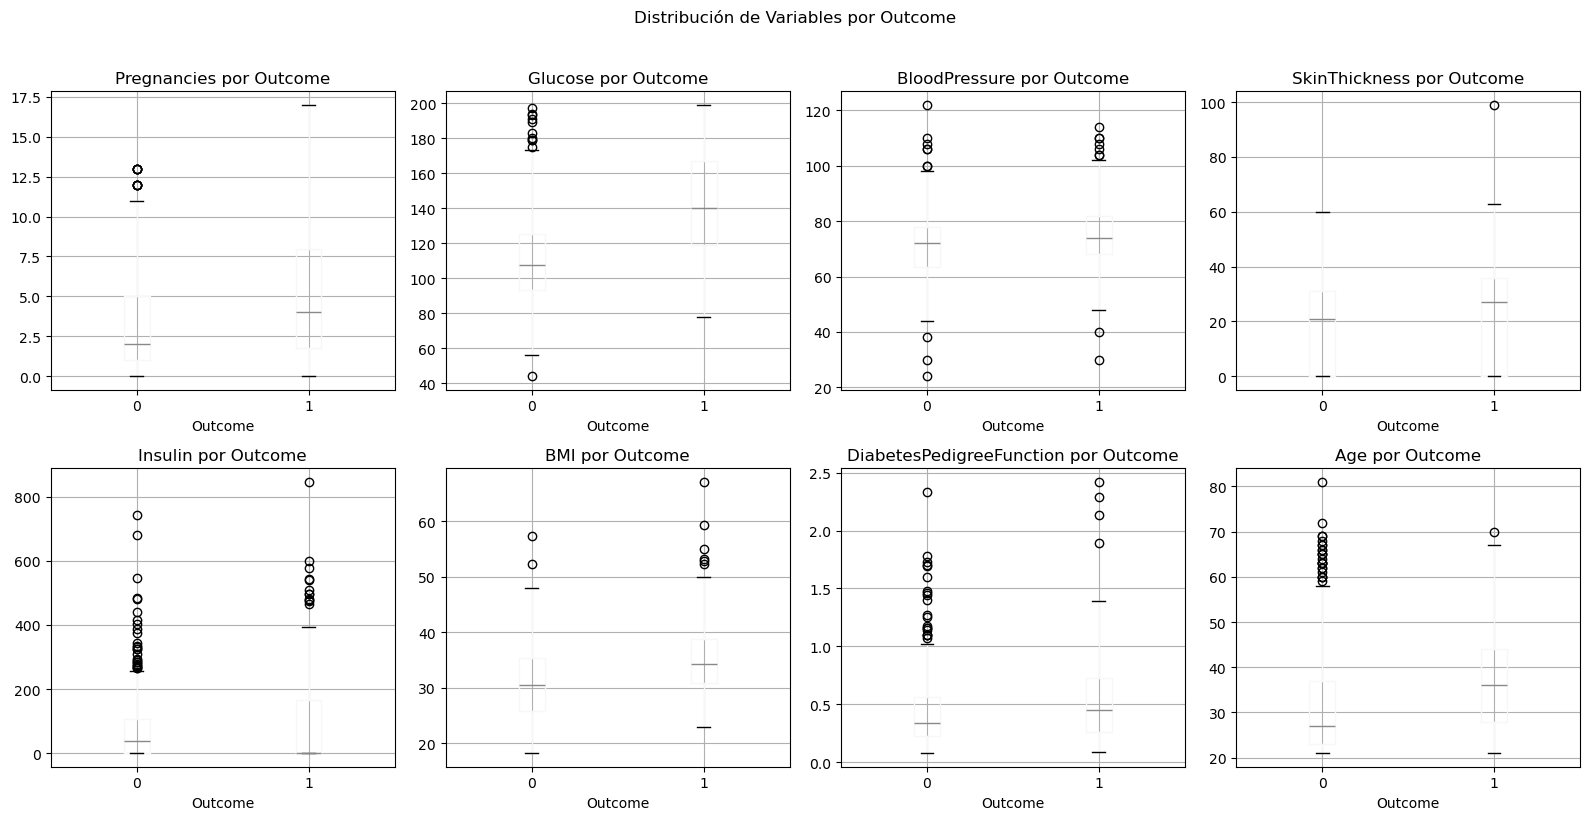

In [ ]:
print("ANÁLISIS EXPLORATORIO DE DATOS")

print("\nSTADÍSTICAS DESCRIPTIVAS")
print(df.describe())

print("\nINFORMACIÓN DE TIPOS DE DATOS")
print(df.info())


print("\nVALORES NULOS")
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nDETECCIÓN DE VALORES PROBLEMÁTICOS")
columnas_problematicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columnas_problematicas:
    ceros = (df[col] == 0).sum()
    porcentaje = (ceros / len(df)) * 100
    print(f"{col}: {ceros} valores de 0 ({porcentaje:.1f}%)")


df_clean = df.copy()
for col in ['Glucose', 'BloodPressure', 'BMI']:
    df_clean[col] = df_clean[col].replace(0, np.nan)

print(f"\nDespués de reemplazar 0s problemáticos con NaN:")
print(df_clean.isnull().sum())


for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print(f"\nDespués de imputar con mediana:")
print(df_clean.isnull().sum())



print("\nBALANCE DE CLASES")
outcome_counts = df['Outcome'].value_counts()
outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100

print("Distribución de la variable objetivo (Outcome):")
for i, (count, percentage) in enumerate(zip(outcome_counts, outcome_percentages)):
    label = "No Diabetes" if outcome_counts.index[i] == 0 else "Diabetes"
    print(f"  {label} (valor {outcome_counts.index[i]}): {count} casos ({percentage:.1f}%)")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
        colors=['lightblue', 'salmon'])
plt.title('Distribución de Clases')

plt.subplot(1, 2, 2)
outcome_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Conteo de Clases')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)

plt.tight_layout()
plt.show()



print("\nVISUALIZACIÓN DE DISTRIBUCIONES")


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, column in enumerate(df_clean.columns):
    if column != 'Outcome':
        axes[i].hist(df_clean[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución de {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')


axes[8].bar(['No Diabetes', 'Diabetes'], outcome_counts.values, color=['lightblue', 'salmon'])
axes[8].set_title('Distribución de Outcome')
axes[8].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, column in enumerate(df_clean.columns[:-1]):  
    df_clean.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()



print("\nMATRIZ DE CORRELACIÓN")


correlation_matrix = df_clean.corr()


plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()


print("Correlaciones con la variable objetivo:")
correlations_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)
for var, corr in correlations_with_outcome.items():
    if var != 'Outcome':
        print(f"  {var}: {corr:.3f}")



print("\nANÁLISIS COMPARATIVO POR GRUPOS")


print("Estadísticas descriptivas por grupo:")
print("\nGrupo Sin Diabetes (Outcome = 0):")
print(df_clean[df_clean['Outcome'] == 0].describe())

print("\nGrupo Con Diabetes:")
print(df_clean[df_clean['Outcome'] == 1].describe())


fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, column in enumerate(df_clean.columns[:-1]):
    df_clean.boxplot(column=column, by='Outcome', ax=axes[i])
    axes[i].set_title(f'{column} por Outcome')
    axes[i].set_xlabel('Outcome')

plt.suptitle('Distribución de Variables por Outcome', y=1.02)
plt.tight_layout()
plt.show()

----
### 3. Entrenamiento con AutoGluon

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.9.23
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:48:46 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       1.41 GB / 8.00 GB (17.7%)
Disk Space Avail:   145.55 GB / 460.43 GB (31.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Co

ENTRENAMIENTO CON AUTOGLUON
Tamaño del conjunto de entrenamiento: 614 muestras
Tamaño del conjunto de prueba: 154 muestras

Distribución en conjunto de entrenamiento:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Distribución en conjunto de prueba:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

MODELO BASE: REGRESIÓN LOGÍSTICA
Rendimiento del Modelo Base:
  Accuracy: 0.7143
  Precision: 0.6087
  Recall: 0.5185
  F1-Score: 0.5600

ENTRENAMIENTO CON AUTOGLUON
Iniciando entrenamiento con AutoGluon...
Configuración:
  - Preset: best_quality
  - Métrica: accuracy
  - Tiempo límite: 300 segundos (5 minutos)


Leaderboard on holdout data (DyStack):
                      model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   RandomForestEntr_BAG_L1       0.840580   0.761468    accuracy        0.046118       0.052894   0.332361                 0.046118                0.052894           0.332361            1       True          4
1         LightGBMXT_BAG_L2       0.840580   0.798165    accuracy        0.468142       0.434466  16.881910                 0.012727                0.018412           1.254820            2       True         11
2   RandomForestGini_BAG_L2       0.840580   0.785321    accuracy        0.490395       0.472034  16.453430                 0.034980                0.055981           0.826340            2       True         13
3   RandomForestEntr_BAG_L2       0.840580   0.781651    accuracy        0.490553       0.466450  15.951915          


RESULTADOS DE AUTOGLUON


Computing feature importance via permutation shuffling for 8 features using 154 rows with 5 shuffle sets...


Tabla de Líderes (Top 10 modelos):
                      model  score_test  score_val eval_metric  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       XGBoost_r194_BAG_L1    0.772727   0.788274    accuracy        0.048574       0.028752  0.922226                 0.048574                0.028752           0.922226            1       True         22
1           LightGBM_BAG_L1    0.766234   0.783388    accuracy        0.019131       0.012975  0.977424                 0.019131                0.012975           0.977424            1       True          2
2        XGBoost_r89_BAG_L1    0.766234   0.789902    accuracy        0.043526       0.015358  0.798824                 0.043526                0.015358           0.798824            1       True         18
3      LightGBM_r130_BAG_L1    0.753247   0.798046    accuracy        0.009829       0.005540  1.291182                 0.009829         

	3.1s	= Expected runtime (0.62s per shuffle set)
	0.58s	= Actual runtime (Completed 5 of 5 shuffle sets)


Importancia de características:
                          importance    stddev   p_value  n  p99_high   p99_low
Glucose                     0.075325  0.043705  0.009121  5  0.165313 -0.014664
Age                         0.003896  0.009848  0.213159  5  0.024173 -0.016381
SkinThickness              -0.009091  0.009848  0.946031  5  0.011186 -0.029368
Pregnancies                -0.010390  0.016933  0.879009  5  0.024476 -0.045255
BloodPressure              -0.011688  0.011616  0.956177  5  0.012229 -0.035606
DiabetesPedigreeFunction   -0.014286  0.022211  0.888117  5  0.031447 -0.060019
Insulin                    -0.015584  0.007404  0.995369  5 -0.000340 -0.030829
BMI                        -0.015584  0.020328  0.919186  5  0.026271 -0.057440


<Figure size 1000x600 with 0 Axes>

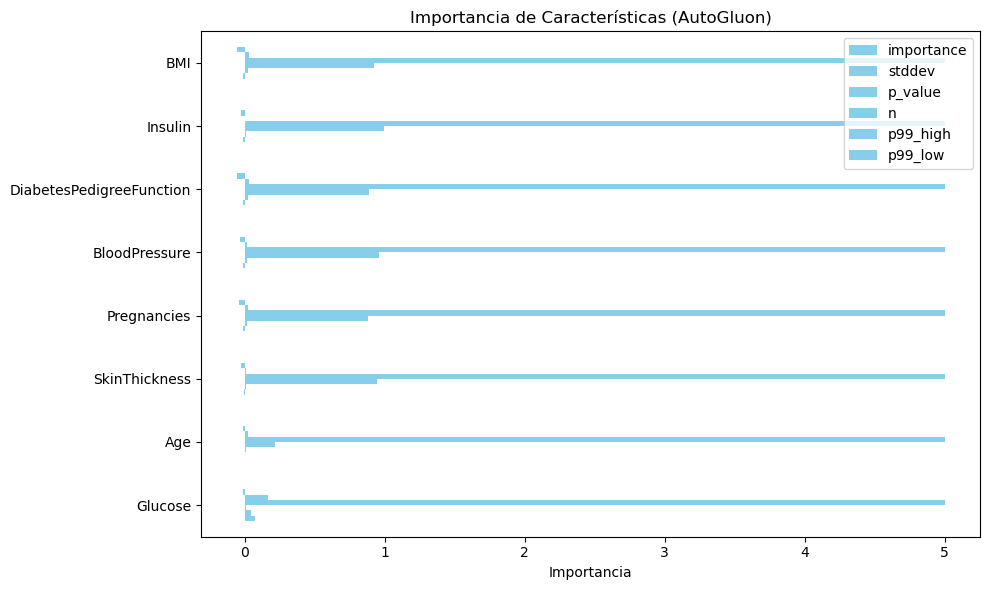

In [ ]:
print("ENTRENAMIENTO CON AUTOGLUON")



X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(f"\nDistribución en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribución en conjunto de prueba:")
print(y_test.value_counts(normalize=True))


print("\nMODELO BASE: REGRESIÓN LOGÍSTICA")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


y_pred_base = log_reg.predict(X_test_scaled)
y_pred_base_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

base_accuracy = accuracy_score(y_test, y_pred_base)
base_precision = precision_score(y_test, y_pred_base)
base_recall = recall_score(y_test, y_pred_base)
base_f1 = f1_score(y_test, y_pred_base)

print(f"Rendimiento del Modelo Base:")
print(f"  Accuracy: {base_accuracy:.4f}")
print(f"  Precision: {base_precision:.4f}")
print(f"  Recall: {base_recall:.4f}")
print(f"  F1-Score: {base_f1:.4f}")


print("\nENTRENAMIENTO CON AUTOGLUON")


label = 'Outcome'
save_path = 'agModels-predictors'  


train_dataset = TabularDataset(train_data)
test_dataset = TabularDataset(test_data)

print("Iniciando entrenamiento con AutoGluon...")
print("Configuración:")
print("  - Preset: best_quality")
print("  - Métrica: accuracy")
print("  - Tiempo límite: 300 segundos (5 minutos)")


predictor = TabularPredictor(
    label=label,
    path=save_path,
    eval_metric='accuracy'
).fit(
    train_dataset,
    presets='best_quality',
    time_limit=300,  
    ag_args_fit={'num_gpus': 0}  
)


print("\nRESULTADOS DE AUTOGLUON")


leaderboard = predictor.leaderboard(test_dataset, silent=True)
print("Tabla de Líderes (Top 10 modelos):")
print(leaderboard.head(10).to_string())


best_model = leaderboard.index[0]  
print(f"\nMejor modelo: {best_model}")


model_names = predictor.model_names()
print(f"Modelos entrenados: {len(model_names)}")
print(f"Algunos modelos: {model_names[:3]}")  


y_pred_ag = predictor.predict(test_dataset)
y_pred_ag_proba = predictor.predict_proba(test_dataset).iloc[:, 1]


ag_accuracy = accuracy_score(y_test, y_pred_ag)
ag_precision = precision_score(y_test, y_pred_ag)
ag_recall = recall_score(y_test, y_pred_ag)
ag_f1 = f1_score(y_test, y_pred_ag)

print(f"\nRendimiento del Mejor Modelo de AutoGluon:")
print(f"  Accuracy: {ag_accuracy:.4f}")
print(f"  Precision: {ag_precision:.4f}")
print(f"  Recall: {ag_recall:.4f}")
print(f"  F1-Score: {ag_f1:.4f}")


print("\nIMPORTANCIA DE CARACTERÍSTICAS")


try:
    feature_importance = predictor.feature_importance(test_dataset)
    print("Importancia de características:")
    print(feature_importance.to_string())
    
    
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='barh', color='skyblue')
    plt.title('Importancia de Características (AutoGluon)')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    try:
        feature_importance = predictor.feature_importance(test_dataset, model=best_model)
        print("Importancia de características")
        print(feature_importance)
        
        plt.figure(figsize=(10, 6))
        if isinstance(feature_importance, pd.Series):
            feature_importance.plot(kind='barh', color='skyblue')
        else:
            feature_importance.plot(kind='barh', color='skyblue')
        plt.title('Importancia de Características (AutoGluon)')
        plt.xlabel('Importancia')
        plt.tight_layout()
        plt.show()
        
    except Exception as ex:
        print(f"Error: {ex}")


----

### 4. Evaluación del Modelo

EVALUACIÓN DETALLADA DEL MODELO

COMPARACIÓN: MODELO BASE vs AUTOGLUON
  Métrica  Regresión Logística  AutoGluon (Mejor)    Mejora  Mejora (%)
 Accuracy             0.714286           0.707792 -0.006494       -0.91
Precision             0.608696           0.591837 -0.016859       -2.77
   Recall             0.518519           0.537037  0.018519        3.57
 F1-Score             0.560000           0.563107  0.003107        0.55

MATRICES DE CONFUSIÓN


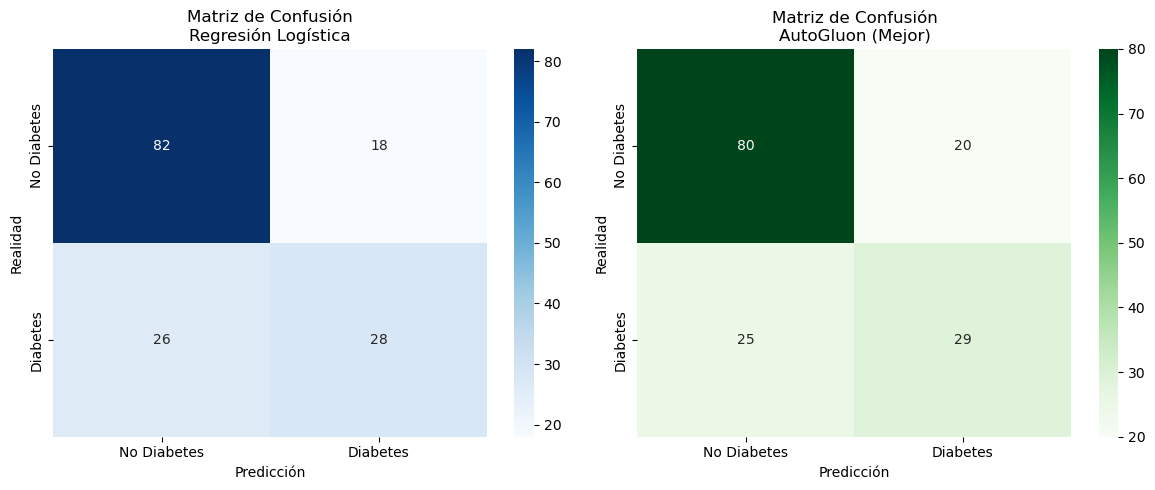


REPORTES DE CLASIFICACIÓN
Regresión Logística:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.82      0.79       100
    Diabetes       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


AutoGluon (Mejor Modelo):
              precision    recall  f1-score   support

 No Diabetes       0.76      0.80      0.78       100
    Diabetes       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154


CURVAS ROC Y AUC


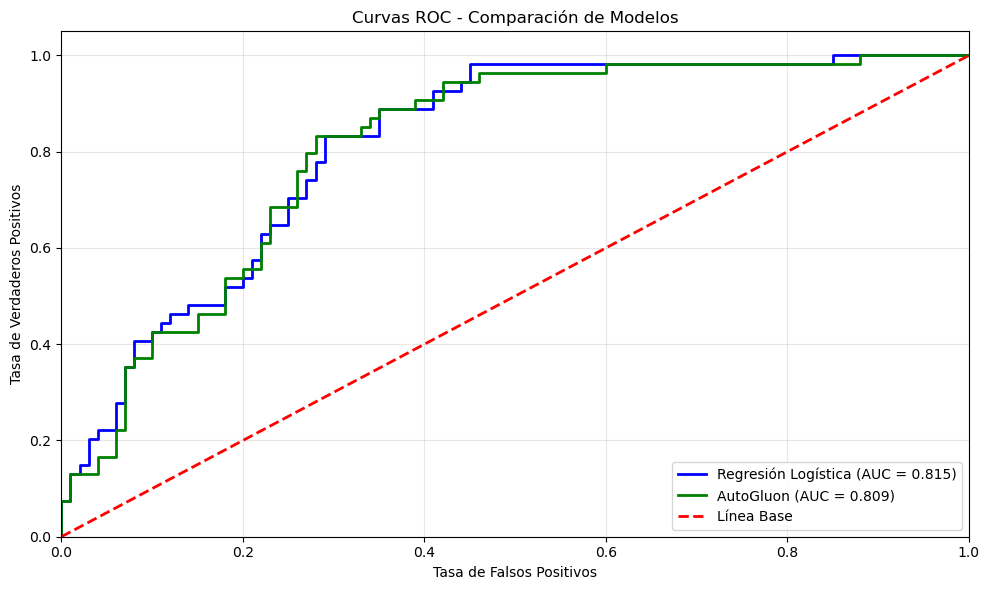

AUC Scores:
  Regresión Logística: 0.8148
  AutoGluon: 0.8094
  Mejora en AUC: -0.0054


In [ ]:
print("EVALUACIÓN DETALLADA DEL MODELO")



print("\nCOMPARACIÓN: MODELO BASE vs AUTOGLUON")

comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Regresión Logística': [base_accuracy, base_precision, base_recall, base_f1],
    'AutoGluon (Mejor)': [ag_accuracy, ag_precision, ag_recall, ag_f1]
})

comparison_df['Mejora'] = comparison_df['AutoGluon (Mejor)'] - comparison_df['Regresión Logística']
comparison_df['Mejora (%)'] = (comparison_df['Mejora'] / comparison_df['Regresión Logística'] * 100).round(2)

print(comparison_df.to_string(index=False))



print("\nMATRICES DE CONFUSIÓN")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[0].set_title('Matriz de Confusión\nRegresión Logística')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Realidad')


cm_ag = confusion_matrix(y_test, y_pred_ag)
sns.heatmap(cm_ag, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Matriz de Confusión\nAutoGluon (Mejor)')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Realidad')

plt.tight_layout()
plt.show()



print("\nREPORTES DE CLASIFICACIÓN")

print("Regresión Logística:")
print(classification_report(y_test, y_pred_base, 
                          target_names=['No Diabetes', 'Diabetes']))

print("\nAutoGluon (Mejor Modelo):")
print(classification_report(y_test, y_pred_ag, 
                          target_names=['No Diabetes', 'Diabetes']))



print("\nCURVAS ROC Y AUC")


fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_base_proba)
auc_base = auc(fpr_base, tpr_base)

fpr_ag, tpr_ag, _ = roc_curve(y_test, y_pred_ag_proba)
auc_ag = auc(fpr_ag, tpr_ag)


plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, color='blue', lw=2, 
         label=f'Regresión Logística (AUC = {auc_base:.3f})')
plt.plot(fpr_ag, tpr_ag, color='green', lw=2, 
         label=f'AutoGluon (AUC = {auc_ag:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Línea Base')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC Scores:")
print(f"  Regresión Logística: {auc_base:.4f}")
print(f"  AutoGluon: {auc_ag:.4f}")
print(f"  Mejora en AUC: {auc_ag - auc_base:.4f}")


----

### 5. Reflexión
Trabajar en este laboratorio utilizando la herramienta de AutoGluon fue una experiencia nueva pero muy útil, ya que no solemos usar esta herramienta. Sentimos que la herramienta nos ahorró bastante tiempo porque entrena y prueba varios modelos sin que tengamos que programar todo desde cero. Esto nos permitió concentrarnos en entender los datos y analizar resultados, en lugar de pasar horas ajustando parámetros manualmente. También fue bueno que AutoGluon muestra métricas y gráficas como la importancia de variables y la matriz de confusión, lo que facilita interpretar el modelo. 

  

Sin embargo, también vimos algunas desventajas. Al automatizar tanto, se pierde control sobre detalles como cómo se procesan las variables o cómo se ajustan algunos hiperparámetros. Además, puede ser una “caja negra” y cuesta explicar exactamente por qué el modelo tomó ciertas decisiones, algo importante si los resultados van a usarse en salud. 

  

Sobre las métricas, creemos que recall (sensibilidad) y F1-score son muy importantes para este problema, porque es mejor detectar la mayoría de casos positivos de diabetes aunque a veces haya falsos positivos. También vimos útil el ROC-AUC, porque da una idea general de qué tan bien separa el modelo entre pacientes con y sin diabetes. 

  

Si se usa AutoML en salud hay que tener cuidado con la calidad y limpieza de datos, evitar que información futura se filtre en el entrenamiento (data leakage), revisar el balance de clases y validar el modelo con datos nuevos. También es clave no confiarse solo del “accuracy” y buscar métricas que tengan sentido clínico. 

  

Comparado con hacer un modelo manual, AutoGluon fue mucho más rápido y práctico, sobre todo para empezar. Pero creemos que, en un entorno real de salud, sería mejor luego afinar un modelo propio, más controlado y explicable, para tener seguridad de cómo toma decisiones y poder justificarlo ante médicos o usuarios. 

----